In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 48
BATCH_SIZE = 64
CHANNELS = 3
EPOCHS = 20

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "FacialEmotion_Split_Data/train",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 28709 files belonging to 7 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "FacialEmotion_Split_Data/valid",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3589 files belonging to 7 classes.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "FacialEmotion_Split_Data/test",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3589 files belonging to 7 classes.


In [9]:
class_names = train_ds.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [10]:
len(train_ds)

449

In [11]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(64, 48, 48, 3)
[2 2 5 3 4 0 3 4 2 0 2 5 0 3 2 0 3 2 0 3 0 4 6 2 6 3 5 3 0 3 4 6 5 3 2 2 3
 3 3 0 6 5 4 0 3 2 6 6 4 3 3 0 6 5 5 2 4 4 6 4 4 0 5 4]


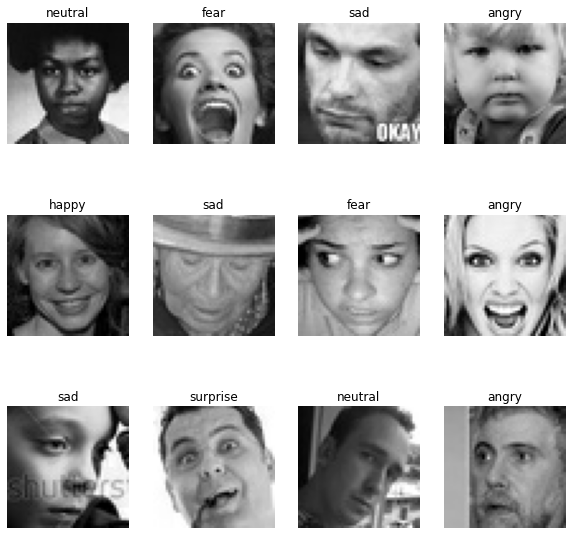

In [12]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)     # all this is to improve the performacne
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)    
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)  

In [14]:
# lets do some preprocessing

In [15]:
'''
These layers are for preprocessing and we will use it later while model building. One is to resize the image and other divides
the size of 48 by 47 to get a number between 0 and 1
'''
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/47)
])

In [16]:
'''
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.
'''
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
# model building

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 48, 48, 3)           0         
                                                                 
 conv2d (Conv2D)             (64, 46, 46, 32)          896       
                                                                 
 conv2d_1 (Conv2D)           (64, 44, 44, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (64, 42, 42, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (64, 40, 40, 64)          36928     
                                                                 
 max_pooling2d (MaxPooling2D  (64, 20, 20, 64)         0         
 )                                                               
                                                      

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
449/449 [==============================] - 317s 630ms/step - loss: 1.7080 - accuracy: 0.3090 - val_loss: 1.5207 - val_accuracy: 0.4152
Epoch 2/20
449/449 [==============================] - 264s 587ms/step - loss: 1.4229 - accuracy: 0.4517 - val_loss: 1.3296 - val_accuracy: 0.4865
Epoch 3/20
449/449 [==============================] - 299s 666ms/step - loss: 1.2708 - accuracy: 0.5173 - val_loss: 1.2591 - val_accuracy: 0.5244
Epoch 4/20
449/449 [==============================] - 269s 599ms/step - loss: 1.1895 - accuracy: 0.5506 - val_loss: 1.2583 - val_accuracy: 0.5366
Epoch 5/20
449/449 [==============================] - 266s 593ms/step - loss: 1.1151 - accuracy: 0.5810 - val_loss: 1.2336 - val_accuracy: 0.5419
Epoch 6/20
449/449 [==============================] - 267s 596ms/step - loss: 1.0510 - accuracy: 0.6040 - val_loss: 1.2104 - val_accuracy: 0.5542
Epoch 7/20
449/449 [==============================] - 271s 603ms/step - loss: 0.9893 - accuracy: 0.6279 - val_loss: 1.1881 -

In [22]:
scores = model.evaluate(test_ds)

57/57 [==============================] - 12s 135ms/step - loss: 2.2788 - accuracy: 0.5400


In [23]:
scores

[2.2787954807281494, 0.5399832725524902]

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 449}

In [26]:
history.history

{'loss': [1.7079660892486572,
  1.4228827953338623,
  1.2708206176757812,
  1.1894915103912354,
  1.1150758266448975,
  1.0510369539260864,
  0.9892667531967163,
  0.9238662123680115,
  0.858855128288269,
  0.7937955856323242,
  0.7319486737251282,
  0.6650424003601074,
  0.6058447360992432,
  0.5421091914176941,
  0.4961453974246979,
  0.44198647141456604,
  0.3973657190799713,
  0.3600218594074249,
  0.32942846417427063,
  0.2973199486732483],
 'accuracy': [0.308962345123291,
  0.45170503854751587,
  0.5173290371894836,
  0.5506287217140198,
  0.5810372829437256,
  0.603956937789917,
  0.6279215812683105,
  0.6564840078353882,
  0.6805879473686218,
  0.704482913017273,
  0.7288655042648315,
  0.7545369267463684,
  0.7739036679267883,
  0.798530101776123,
  0.8189417719841003,
  0.8348601460456848,
  0.8541224002838135,
  0.8684036135673523,
  0.8788185119628906,
  0.8920199275016785],
 'val_loss': [1.5206916332244873,
  1.3295949697494507,
  1.2591397762298584,
  1.2583403587341309,


In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

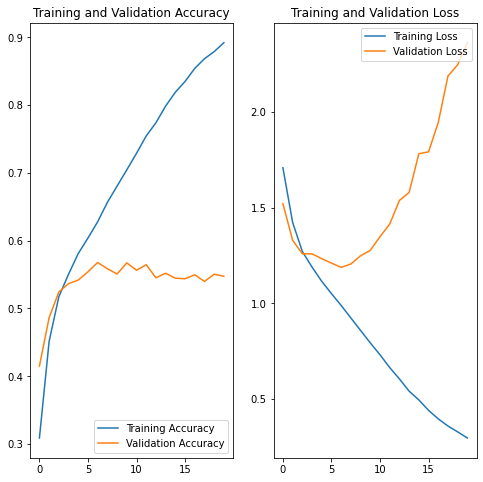

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: sad
predicted label: fear


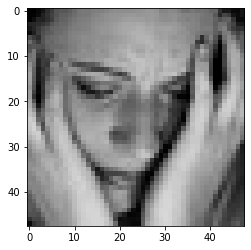

In [29]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

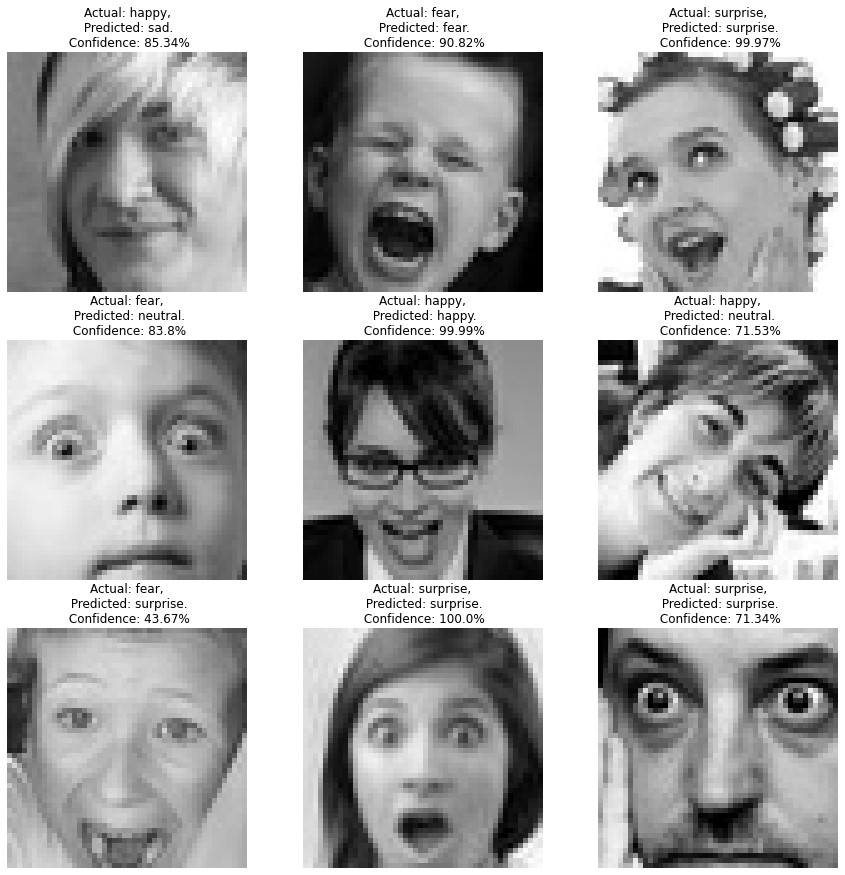

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [32]:
model.save("../fer_1.h5")